This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Getting started with neural networks: Classification and regression

## Classifying movie reviews: A binary classification example

### The IMDB dataset

**Loading the IMDB dataset**

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)

17464789/17464789 [==============================] - 2s 0us/step


In [2]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [3]:
len(train_data[0])

218

In [4]:
train_labels[0]

1

**Ajout DC : liste en compréhension**

Les listes en compréhension autorisent une syntaxe allégée pour la création de listes.

Pour plus d'informations sur les listes en compréhension, voir : https://fr.wikipedia.org/wiki/Liste_en_compréhension
Sur les listes en compréhension avec Python voir https://gayerie.dev/docs/python/python3/list_comprehension.html

In [5]:
[i**2 for i in range(5)]

[0, 1, 4, 9, 16]

In [6]:
[i**2 for i in range(5) if i % 2 == 0]

[0, 4, 16]

**Fin ajout DC**

In [7]:
max([max(sequence) for sequence in train_data])

9999

**Decoding reviews back to text**

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


*Note that the indices are offset by 3 because 0, 1 and 2 are reserved indices for "padding", "start of sequence" and "unknown".*

*Ajout DC*

In [9]:
type(word_index)

dict

In [10]:
len(word_index)

88584

In [11]:
test_word_index = { "bonjour": 3, "au": 7, "revoir": 12}
reverse_test_word_index = dict(
    [(value, key) for (key, value) in test_word_index.items()])
reverse_test_word_index

{3: 'bonjour', 7: 'au', 12: 'revoir'}

In [12]:
[reverse_test_word_index.get(i, "test") for i in [5, 7, 12, 2] ]

['test', 'au', 'revoir', 'test']

In [13]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [14]:
len(train_data[1])

189

In [15]:
decoded_review2 = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[1]])
decoded_review2

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [16]:
train_labels[1]

0

*Fin ajout DC*

### Preparing the data

**Encoding the integer sequences via multi-hot encoding**

In [17]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [18]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [19]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

### Building your model

**Model definition**

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

**Compiling the model**

In [21]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [22]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [23]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 4s 70ms/step - loss: 0.5200 - accuracy: 0.7837 - val_loss: 0.3961 - val_accuracy: 0.8537
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3065 - accuracy: 0.9061 - val_loss: 0.3170 - val_accuracy: 0.8764
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.2259 - accuracy: 0.9251 - val_loss: 0.2808 - val_accuracy: 0.8913
Epoch 4/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1782 - accuracy: 0.9442 - val_loss: 0.2854 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1465 - accuracy: 0.9525 - val_loss: 0.2876 - val_accuracy: 0.8880
Epoch 6/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1199 - accuracy: 0.9637 - val_loss: 0.2917 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1020 - accuracy: 0.9703 - val_loss: 0.3123 - val_accuracy: 0.8812
Epoch 8/20
30

In [24]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

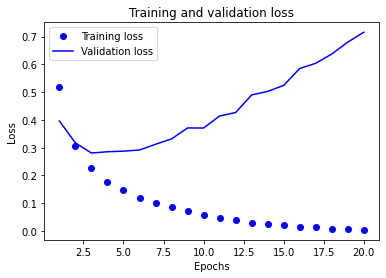

In [25]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

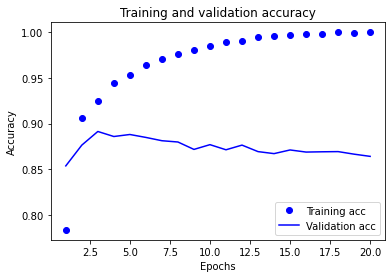

In [26]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [27]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 3s 20ms/step - loss: 0.4984 - accuracy: 0.7782
Epoch 2/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2807 - accuracy: 0.9109
Epoch 3/4
49/49 [==============================] - 1s 20ms/step - loss: 0.2106 - accuracy: 0.9284
Epoch 4/4
782/782 [==============================] - 3s 4ms/step - loss: 0.2954 - accuracy: 0.8826


In [28]:
results

[0.2954162061214447, 0.8826000094413757]

### Using a trained model to generate predictions on new data

In [29]:
model.predict(x_test)

782/782 [==============================] - 3s 4ms/step


array([[0.17775984],
       [0.9956205 ],
       [0.7867543 ],
       ...,
       [0.08923009],
       [0.06880782],
       [0.56179106]], dtype=float32)

### Further experiments

### Wrapping up

## Classifying newswires: A multiclass classification example

### The Reuters dataset

**Loading the Reuters dataset**

In [30]:
from tensorflow.keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [31]:
len(train_data)

8982

In [32]:
len(test_data)

2246

In [33]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

**Decoding newswires back to text**

In [34]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = " ".join([reverse_word_index.get(i - 3, "?") for i in
    train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [35]:
train_labels[10]

3

### Preparing the data

**Encoding the input data**

In [36]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

**Encoding the labels**

In [37]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
y_train = to_one_hot(train_labels)
y_test = to_one_hot(test_labels)

In [38]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

### Building your model

**Model definition**

In [39]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(46, activation="softmax")
])

**Compiling the model**

In [40]:
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])

### Validating your approach

**Setting aside a validation set**

In [41]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = y_train[:1000]
partial_y_train = y_train[1000:]

**Training the model**

In [43]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 56ms/step - loss: 0.1101 - accuracy: 0.9574 - val_loss: 1.0695 - val_accuracy: 0.8040
Epoch 2/20
16/16 [==============================] - 1s 48ms/step - loss: 0.1063 - accuracy: 0.9582 - val_loss: 1.0671 - val_accuracy: 0.8030
Epoch 3/20
16/16 [==============================] - 1s 47ms/step - loss: 0.1056 - accuracy: 0.9593 - val_loss: 1.1148 - val_accuracy: 0.8090
Epoch 4/20
16/16 [==============================] - 1s 50ms/step - loss: 0.1042 - accuracy: 0.9609 - val_loss: 1.1027 - val_accuracy: 0.8080
Epoch 5/20
16/16 [==============================] - 1s 47ms/step - loss: 0.0996 - accuracy: 0.9584 - val_loss: 1.1105 - val_accuracy: 0.8120
Epoch 6/20
16/16 [==============================] - 1s 48ms/step - loss: 0.0993 - accuracy: 0.9587 - val_loss: 1.1416 - val_accuracy: 0.8040
Epoch 7/20
16/16 [==============================] - 1s 48ms/step - loss: 0.0979 - accuracy: 0.9594 - val_loss: 1.1170 - val_accuracy: 0.8060
Epoch 8/20
16

**Plotting the training and validation loss**

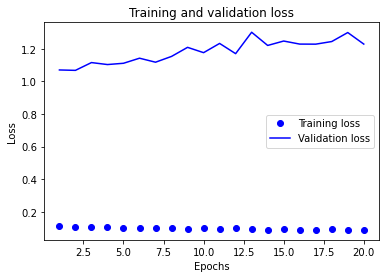

In [44]:
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

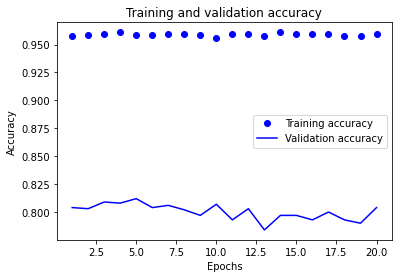

In [45]:
plt.clf()
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

**Retraining a model from scratch**

In [46]:
model = keras.Sequential([
  layers.Dense(64, activation="relu"),
  layers.Dense(64, activation="relu"),
  layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/9
18/18 [==============================] - 2s 41ms/step - loss: 2.5628 - accuracy: 0.5314
Epoch 2/9
18/18 [==============================] - 1s 37ms/step - loss: 1.3647 - accuracy: 0.7121
Epoch 3/9
18/18 [==============================] - 1s 36ms/step - loss: 1.0107 - accuracy: 0.7867
Epoch 4/9
18/18 [==============================] - 1s 41ms/step - loss: 0.7848 - accuracy: 0.8390
Epoch 5/9
18/18 [==============================] - 1s 41ms/step - loss: 0.6193 - accuracy: 0.8744
Epoch 6/9
18/18 [==============================] - 1s 41ms/step - loss: 0.4911 - accuracy: 0.8961
Epoch 7/9
18/18 [==============================] - 1s 41ms/step - loss: 0.3937 - accuracy: 0.9163
Epoch 8/9
18/18 [==============================] - 1s 41ms/step - loss: 0.3247 - accuracy: 0.9313
Epoch 9/9
71/71 [==============================] - 1s 5ms/step - loss: 0.9744 - accuracy: 0.7925


In [47]:
results

[0.9743615388870239, 0.7925200462341309]

In [48]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
hits_array.mean()

0.18210151380231523

### Generating predictions on new data

In [49]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [50]:
predictions[0].shape

(46,)

In [51]:
np.sum(predictions[0])

0.99999994

In [52]:
np.argmax(predictions[0])

3

### A different way to handle the labels and the loss

In [53]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [54]:
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

### The importance of having sufficiently large intermediate layers

**A model with an information bottleneck**

In [55]:
model = keras.Sequential([
    layers.Dense(64, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(46, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 4s 32ms/step - loss: 3.6137 - accuracy: 0.0861 - val_loss: 3.3188 - val_accuracy: 0.0450
Epoch 2/20
63/63 [==============================] - 2s 24ms/step - loss: 2.8633 - accuracy: 0.1921 - val_loss: 2.4549 - val_accuracy: 0.4350
Epoch 3/20
63/63 [==============================] - 2s 24ms/step - loss: 2.0548 - accuracy: 0.4732 - val_loss: 1.9246 - val_accuracy: 0.5900
Epoch 4/20
63/63 [==============================] - 2s 24ms/step - loss: 1.6188 - accuracy: 0.6297 - val_loss: 1.7029 - val_accuracy: 0.6160
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.4057 - accuracy: 0.6673 - val_loss: 1.5888 - val_accuracy: 0.6410
Epoch 6/20
63/63 [==============================] - 1s 23ms/step - loss: 1.2820 - accuracy: 0.6800 - val_loss: 1.5557 - val_accuracy: 0.6380
Epoch 7/20
63/63 [==============================] - 1s 24ms/step - loss: 1.1877 - accuracy: 0.6838 - val_loss: 1.5124 - val_accuracy: 0.6460
Epoch 8/20
63

### Further experiments

### Wrapping up

## Predicting house prices: A regression example

### The Boston Housing Price dataset

**Loading the Boston housing dataset**

In [56]:
from tensorflow.keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [57]:
train_data.shape

(404, 13)

In [58]:
test_data.shape

(102, 13)

In [59]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

### Preparing the data

**Normalizing the data**

In [60]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std
test_data -= mean
test_data /= std

### Building your model

**Model definition**

In [61]:
def build_model():
    model = keras.Sequential([
        layers.Dense(64, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(1)
    ])
    model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
    return model

### Validating your approach using K-fold validation

**K-fold validation**

In [63]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=16, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

Processing fold #0
Processing fold #1
Processing fold #2
Processing fold #3


In [64]:
all_scores

[2.0852413177490234,
 2.3832032680511475,
 2.5064821243286133,
 2.3714659214019775]

In [65]:
np.mean(all_scores)

2.3365981578826904

**Saving the validation logs at each fold**

In [66]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print(f"Processing fold #{i}")
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=16, verbose=0)
    mae_history = history.history["val_mae"]
    all_mae_histories.append(mae_history)

Processing fold #0
Processing fold #1
Processing fold #2


KeyboardInterrupt: 

**Building the history of successive mean K-fold validation scores**

In [ ]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

**Plotting validation scores**

In [ ]:
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Plotting validation scores, excluding the first 10 data points**

In [ ]:
truncated_mae_history = average_mae_history[10:]
plt.plot(range(1, len(truncated_mae_history) + 1), truncated_mae_history)
plt.xlabel("Epochs")
plt.ylabel("Validation MAE")
plt.show()

**Training the final model**

In [ ]:
model = build_model()
model.fit(train_data, train_targets,
          epochs=130, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

In [ ]:
test_mae_score

### Generating predictions on new data

In [ ]:
predictions = model.predict(test_data)
predictions[0]

### Wrapping up

## Summary